In [2]:
steamid = '76561198020908104'
key = 'AA1A1F692E6D48BFC0F23FB2F7313A2B'

In [3]:
def get_api_link(interface: str, method: str, version: str, **kwargs):
    url = f'https://api.steampowered.com/{interface}/{method}/v000{version}'
    if kwargs:
        url += '/?'
        for key in kwargs:
            url += str(key) + '=' + str(kwargs[key]) + '&'
    return url

In [4]:
link = get_api_link('ISteamUserStats', 'GetGlobalAchievementPercentagesForApp', '2', gameid='730')
print(link)
r = requests.get(link).json()

r['achievementpercentages']

https://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid=730&


{'achievements': [{'name': 'GIVE_DAMAGE_LOW', 'percent': 66.69999694824219},
  {'name': 'UNSTOPPABLE_FORCE', 'percent': 66.0999984741211},
  {'name': 'KILL_ENEMY_RELOADING', 'percent': 66},
  {'name': 'KILL_ENEMY_LOW', 'percent': 64.5999984741211},
  {'name': 'WIN_ROUNDS_LOW', 'percent': 63.400001525878906},
  {'name': 'IMMOVABLE_OBJECT', 'percent': 61.599998474121094},
  {'name': 'EARN_MONEY_LOW', 'percent': 60.79999923706055},
  {'name': 'KILL_SNIPER_WITH_SNIPER', 'percent': 60},
  {'name': 'KILL_LOW_DAMAGE', 'percent': 60},
  {'name': 'LOSSLESS_EXTERMINATION', 'percent': 57.599998474121094},
  {'name': 'KILL_ENEMY_LAST_BULLET', 'percent': 55.29999923706055},
  {'name': 'DAMAGE_NO_KILL', 'percent': 53.900001525878906},
  {'name': 'HEADSHOTS_IN_ROUND', 'percent': 52.79999923706055},
  {'name': 'HIP_SHOT', 'percent': 52.29999923706055},
  {'name': 'FAST_ROUND_WIN', 'percent': 51.20000076293945},
  {'name': 'KILLING_SPREE', 'percent': 48.599998474121094},
  {'name': 'DOMINATIONS_LOW', '

In [4]:
link = get_api_link('ISteamUserStats', 'GetPlayerAchievements', '1', key=key, steamid=steamid, appid='730')
print(link)
r = requests.get(link).json()
print(type(r))

https://api.steampowered.com/ISteamUserStats/GetPlayerAchievements/v0001/?key=AA1A1F692E6D48BFC0F23FB2F7313A2B&steamid=76561198020908104&appid=730&
<class 'dict'>


In [8]:
link = get_api_link('ISteamUserStats', 'GetUserStatsForGame', '2', key=key, steamid=steamid, appid='730')
print(link)
r = requests.get(link).json()

https://api.steampowered.com/ISteamUserStats/GetUserStatsForGame/v0002/?key=AA1A1F692E6D48BFC0F23FB2F7313A2B&steamid=76561198020908104&appid=730&


In [9]:
total_rounds = {}

for item in r['playerstats']['stats']:
    if 'total_rounds_' in item['name']:
        if 'played' in item['name']:
            continue
        else:
            total_rounds[item['name'].split('_')[-1]] = int(item['value'])

total_rounds_ordered = {k: v for k, v in sorted(total_rounds.items(), key=lambda item: item[1])}
lists = total_rounds_ordered.items()
map_name, rounds = zip(*lists)

In [10]:
r['playerstats']['stats']

[{'name': 'total_kills', 'value': 25676},
 {'name': 'total_deaths', 'value': 24342},
 {'name': 'total_time_played', 'value': 1387053},
 {'name': 'total_planted_bombs', 'value': 481},
 {'name': 'total_defused_bombs', 'value': 166},
 {'name': 'total_wins', 'value': 7987},
 {'name': 'total_damage_done', 'value': 3714396},
 {'name': 'total_money_earned', 'value': 40604550},
 {'name': 'total_rescued_hostages', 'value': 4},
 {'name': 'total_kills_knife', 'value': 163},
 {'name': 'total_kills_hegrenade', 'value': 24},
 {'name': 'total_kills_glock', 'value': 545},
 {'name': 'total_kills_deagle', 'value': 927},
 {'name': 'total_kills_elite', 'value': 70},
 {'name': 'total_kills_fiveseven', 'value': 164},
 {'name': 'total_kills_xm1014', 'value': 312},
 {'name': 'total_kills_mac10', 'value': 233},
 {'name': 'total_kills_ump45', 'value': 437},
 {'name': 'total_kills_p90', 'value': 674},
 {'name': 'total_kills_awp', 'value': 7013},
 {'name': 'total_kills_ak47', 'value': 5310},
 {'name': 'total_kill

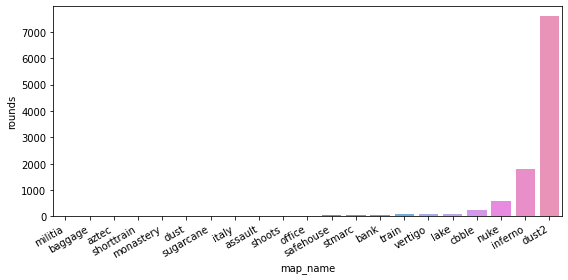

In [10]:
from numpy import median

rounds_df = pd.DataFrame(list(total_rounds_ordered.items()), columns=['map_name', 'rounds'])

f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(x='map_name', y='rounds', data=rounds_df, ax=ax, estimator=median, ci='sd')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [14]:
total_rounds_played = 15649

def calc_percentage(number, total):
    return number * 100 / total

pie_dict = {'other': 0}

for label, value in zip(map_name, rounds):
    perc = calc_percentage(value, total_rounds_played)
    if perc >= 0.8:
        pie_dict[label] = perc
    else:
        pie_dict['other'] += perc

pie_labels = []
pie_values = []

for key in pie_dict:
    pie_labels.append(key)
    pie_values.append(pie_dict[key])

print(pie_labels)
print(pie_values)

['other', 'cbble', 'nuke', 'inferno', 'dust2']
[4.281423733145887, 1.4889130295865551, 3.7893795130679275, 11.451210939996166, 48.50789187807528]


(-1.1696474837543152,
 1.1571950973059175,
 -1.1499413072285956,
 1.1537817387948868)

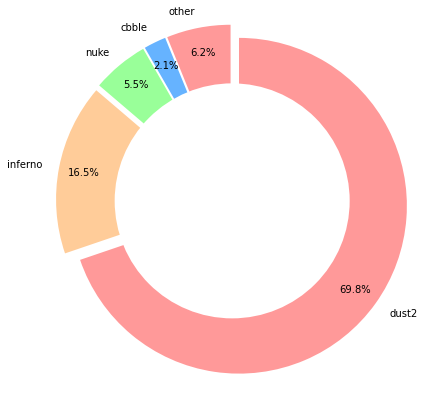

In [15]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots(figsize=(7,7))
pie = ax.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', pctdistance=0.85, explode=(0.05, 0.05, 0.05, 0.05, 0.05), colors=colors, shadow=False, startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

In [51]:
# r['playerstats']['stats']

In [101]:
total_kills = {}
total_shots = {}
total_hits = {}

for item in r['playerstats']['stats']:
    if 'total_kills_' in item['name']:
        if not('headshot' in item['name'] or  'sniper' in item['name'] or 'enemy_weapon' in item['name'] or 'enemy_weapon' in item['name']):
            total_kills[item['name'].split('_')[-1]] = int(item['value'])
    if 'total_shots_' in item['name']:
        if not('headshot' in item['name'] or  'sniper' in item['name'] or 'enemy_weapon' in item['name'] or 'enemy_weapon' in item['name']  or 'fired' in item['name'] or '_hit' in item['name']):
            total_shots[item['name'].split('_')[-1]] = int(item['value'])
    if 'total_hits_' in item['name']:
        if not('headshot' in item['name'] or  'sniper' in item['name'] or 'enemy_weapon' in item['name'] or 'enemy_weapon' in item['name']):
            total_hits[item['name'].split('_')[-1]] = int(item['value'])

total_kills_ordered = {k: v for k, v in sorted(total_kills.items(), key=lambda item: item[1], reverse=True)}
total_shots_ordered = {k: v for k, v in sorted(total_shots.items(), key=lambda item: item[1], reverse=True)}
total_hits_ordered = {k: v for k, v in sorted(total_hits.items(), key=lambda item: item[1], reverse=True)}

lists_kills = total_kills_ordered.items()
lists_shots = total_shots_ordered.items()
lists_hits = total_hits_ordered.items()
weapon, kills = zip(*lists_kills)

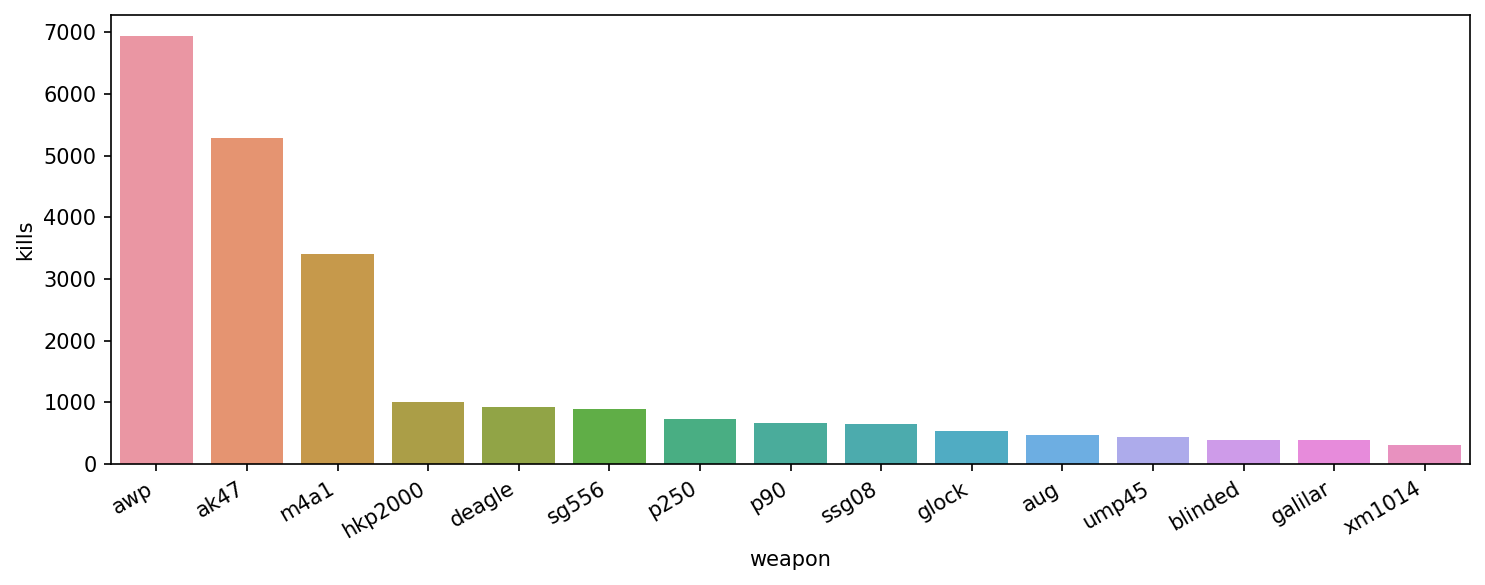

In [87]:
kills_df = pd.DataFrame(list(total_kills_ordered.items())[:15], columns=['weapon', 'kills'])

f, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=150)
sns.barplot(x='weapon', y='kills', data=kills_df, ax=ax, estimator=median, ci='sd')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [127]:
total_kills_no = r['playerstats']['stats'][0]['value']
print(total_kills_no)

def calc_percentage(number, total):
    return number * 100 / total

pie_dict = {'other': 0}

for label, value in zip(weapon, kills):
    perc = calc_percentage(value, total_kills_no)
    if perc >= 2.8:
        pie_dict[label] = perc
    else:
        pie_dict['other'] += perc

pie_labels = []
pie_values = []

for key in pie_dict:
    pie_labels.append(key)
    pie_values.append(pie_dict[key])

25542


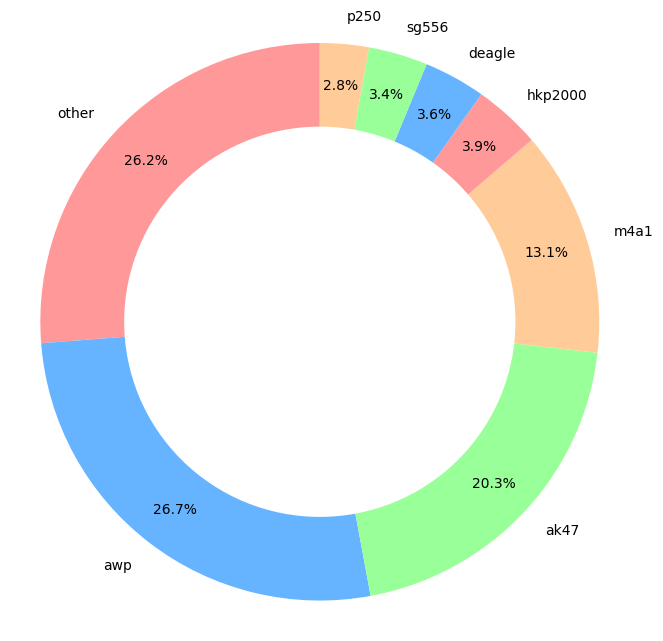

In [130]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
pie = ax.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', pctdistance=0.85, colors=colors, shadow=False, startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.show()

In [126]:
# r['playerstats']['stats']

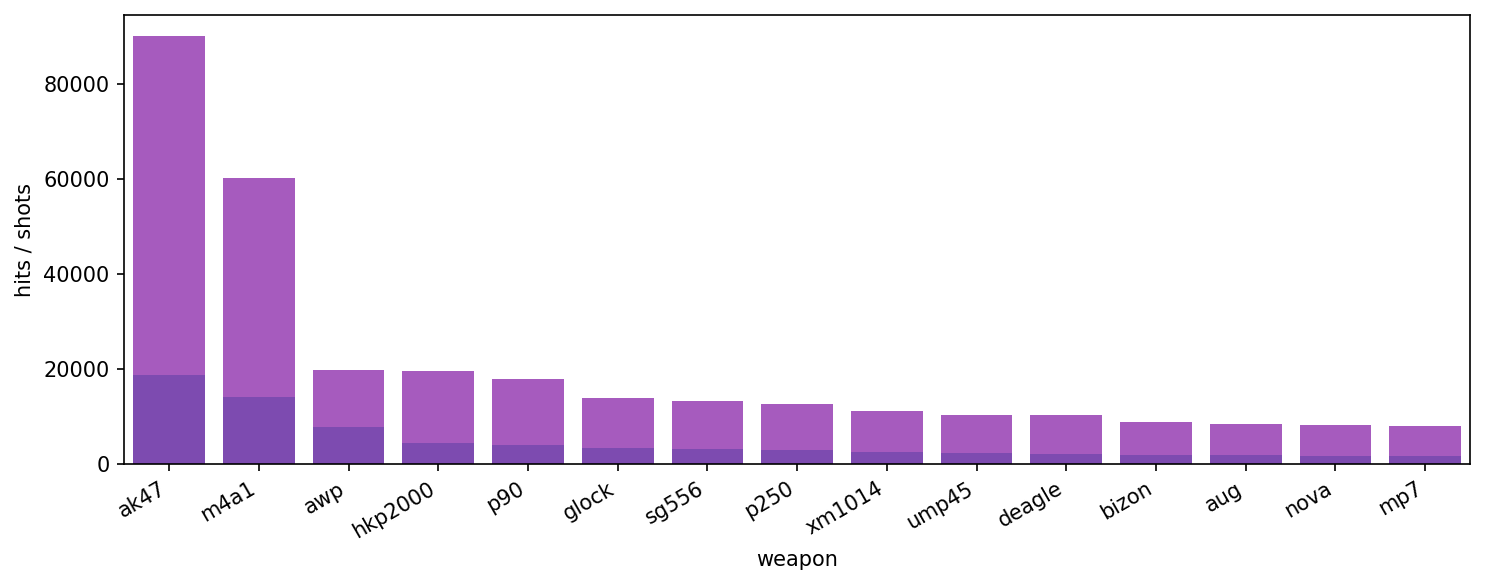

In [135]:
# sns.set(style="ticks", context="talk")
plt.style.use("default")

shots_df = pd.DataFrame(list(total_shots_ordered.items())[:15], columns=['weapon', 'shots'])
hits_df = pd.DataFrame(list(total_hits_ordered.items())[:15], columns=['weapon', 'hits'])

f, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=150)
sns.barplot(x='weapon', y='shots', data=shots_df, ax=ax, estimator=median, ci='sd', palette=['#Af4BCE'], hue=None)
sns.barplot(x='weapon', y='hits', data=hits_df, ax=ax, estimator=median, ci='sd', palette=['#7D3AC1'], hue=None)
# 
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.ylabel('hits / shots')
plt.tight_layout()
plt.show()

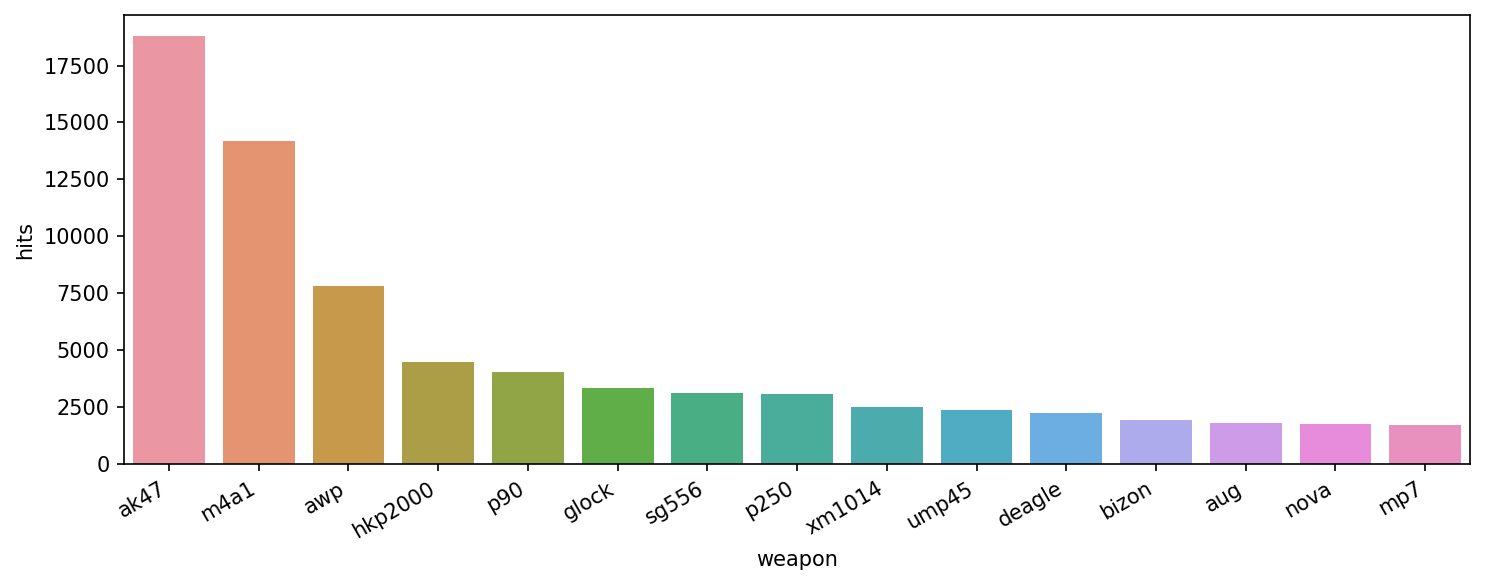

In [92]:
hits_df = pd.DataFrame(list(total_hits_ordered.items())[:15], columns=['weapon', 'hits'])

f, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=150)
sns.barplot(x='weapon', y='hits', data=hits_df, ax=ax, estimator=median, ci='sd')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()